# **Import Library dan Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

df = pd.read_csv("/content/CitarumWater.csv")

# **Menampilkan 5 data pertama**

In [3]:
print ("5 data pertama :")
df.head()

5 data pertama :


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


# **Menampilkan 5 data terakhir**

In [4]:
print ("5 data terakhir :")
df.tail()

5 data terakhir :


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
2495,2496,Citarum,Cisanti,11/2/2022,6.030091,25.55°C,21.152867,4.262901,1.741993,22.357555,1.604541,343.607898,0.056633,-,0.77,1
2496,2497,Citarum,Wangisagara,11/3/2022,6.176031,25.55°C,27.077853,3.151708,5.146220,11.099887,2.266671,612.311167,0.071878,-,1.61,2
2497,2498,Citarum,Koyod,11/4/2022,7.776482,25.55°C,22.022523,7.279574,5.865096,28.140202,2.103214,533.277383,0.044954,-,1.80,2
2498,2499,Citarum,Setelah IPAL Cisirung,11/5/2022,7.047090,25.55°C,32.364635,1.485632,4.624189,29.394513,1.748222,425.598926,0.096612,-,1.46,2
2499,2500,Citarum,Nanjung,11/6/2022,6.459304,25.55°C,27.895749,1.309943,4.763686,19.122593,2.310984,192.266610,0.070611,-,1.49,2


# **Data Understanding**

In [57]:
print ("Data shape (baris,kolom) :")
print(df.shape)

print('\n')
df.info()

print ('\nJumlah data duplikat : ' )
df.duplicated().sum()



Data shape (baris,kolom) :
(2500, 16)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   object 
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 312.6+ 

0

In [58]:
df.columns

Index(['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'pH', 'Temp', 'TSS', 'DO',
       'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'O2', 'IP', 'Class'],
      dtype='object')

In [59]:
df.dtypes

,0
No,int64
NamaSungai,object
TitikPantau,object
Waktu,object
pH,float64
Temp,object
TSS,float64
DO,float64
BOD,float64
COD,float64


In [60]:
df.describe()

,No,pH,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,1250.50000,7.032305,27.856368,3.882005,4.005476,20.511768,1.970393,1.418937e+04,0.074547,1.365796,1.650000
std,721.83216,0.578179,10.551351,2.249329,2.697375,8.969809,1.175104,2.526550e+05,0.320970,1.220703,0.547375
min,1.00000,6.002441,5.000000,0.002140,1.640000,5.440000,0.003784,5.000000e+01,0.004300,0.430000,1.000000
25%,625.75000,6.520722,23.597278,1.925925,2.754331,14.999275,0.955443,2.924867e+02,0.048199,0.840000,1.000000
50%,1250.50000,7.056001,27.671133,3.892147,3.800133,20.044252,1.920408,5.375973e+02,0.065606,1.170000,2.000000
75%,1875.25000,7.531846,31.747063,5.828533,4.947965,25.155492,3.014985,7.829760e+02,0.083315,1.570000,2.000000
max,2500.00000,8.710000,318.000000,7.800000,55.300000,190.000000,5.240000,9.200000e+06,16.000000,14.900000,4.000000


In [61]:
df.describe(include=object)

,NamaSungai,TitikPantau,Waktu,Temp,O2
count,2500,2500,2500,2500,2500
unique,1,8,1785,1,1
top,Citarum,Wangisagara,01/07/2022,25.55°C,-
freq,2500,314,8,2500,2500


# **Data Preparation**

Menghapus kolom yang tidak dibutuhkan


In [62]:
# Menghapus kolom yang tidak diperlukan
df_cleaned = df.drop(columns=["No", "NamaSungai", "TitikPantau", "Waktu", "Temp", "O2"])

# Mengecek missing values
missing_values = df_cleaned.isnull().sum()

# Menampilkan jumlah missing values per kolom
missing_values


,0
pH,0
TSS,0
DO,0
BOD,0
COD,0
Nitrat,0
FecalColiform,0
Fosfat,0
IP,0
Class,0


In [63]:
df_cleaned["Class"].value_counts()

,count
Class,
2,1496
1,948
3,39
4,17


In [64]:
# Mengonversi Class menjadi biner: 0 untuk kelas 1 dan 2, 1 untuk kelas 3 dan 4
df_cleaned["Class"] = df_cleaned["Class"].apply(lambda x: 0 if x in [1, 2] else 1)

# Mengecek kembali distribusi nilai setelah konversi
df_cleaned["Class"].value_counts()


,count
Class,
0,2444
1,56


In [76]:
print(df_cleaned["Class"].value_counts(normalize=True))


Class
0    0.9776
1    0.0224
Name: proportion, dtype: float64


In [85]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [86]:
print(df_cleaned["Class"].value_counts(normalize=True))

Class
0    0.9776
1    0.0224
Name: proportion, dtype: float64


# **Target, Features and Split Data**

In [78]:
# Memisahkan fitur dan target
X = df_cleaned.drop(columns=["Class"])
y = df_cleaned["Class"]

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [79]:
# Standardization (Feature Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Train Model**

In [105]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# **Prediction**

In [106]:
# Make Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# **Evaluation Metrics**

In [107]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Menghitung kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 1.00
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
ROC AUC: 1.00


disini sepertinya terjadi overfitting akan tetapi saya belum menemukan solusinya, jika sudah nanti akan saya revisi

# **Visualization**

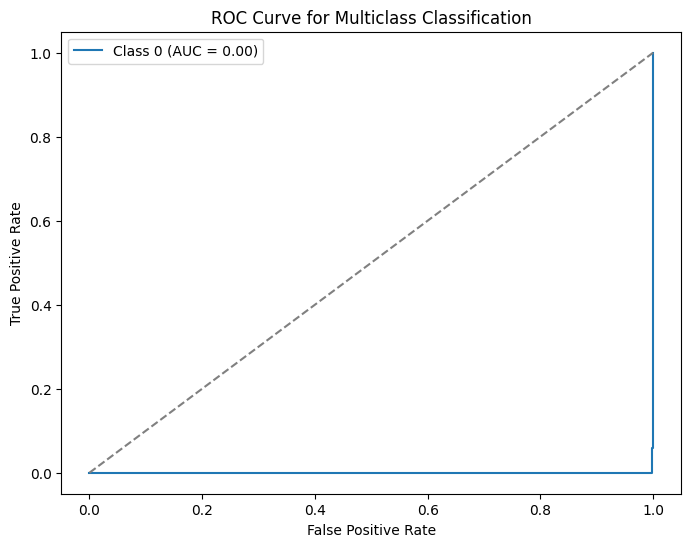

In [110]:
from sklearn.preprocessing import label_binarize

# Binarize target labels untuk multiclass ROC Curve
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Jika multiclass, ROC Curve harus dihitung untuk setiap kelas
n_classes = y_test_bin.shape[1]
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], model.predict_proba(X_test)[:, i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.show()


# **Accuracy**

Accuracy adalah metrik yang mengukur seberapa banyak prediksi yang benar dibandingkan dengan total prediksi yang dilakukan. Rumusnya:

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$


Di mana:

TP (True Positive): Prediksi positif yang benar.

TN (True Negative): Prediksi negatif yang benar.

FP (False Positive): Prediksi positif yang salah.

FN (False Negative): Prediksi negatif yang salah.

Accuracy cocok digunakan jika dataset memiliki distribusi kelas yang seimbang.

---
# **Precision**
Precision mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif yang dilakukan. Rumusnya:
$$
Precision = \frac{TP}{TP + FP}
$$


Precision penting dalam kasus di mana False Positive harus diminimalkan, seperti dalam deteksi spam email.

---
# **Recall**
Recall (juga disebut Sensitivity atau True Positive Rate) mengukur seberapa banyak sampel positif yang berhasil diklasifikasikan dengan benar. Rumusnya:
$$
Recall = \frac{TP}{TP + FN}
$$


Recall penting dalam kasus di mana False Negative harus diminimalkan, seperti dalam diagnosis penyakit.

---
# **F1-Score**
F1-Score adalah rata-rata harmonik dari Precision dan Recall. Rumusnya:
$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$


F1-Score digunakan ketika kita ingin keseimbangan antara Precision dan Recall, terutama jika dataset memiliki ketidakseimbangan kelas.

---
# **AUC-ROC (Area Under Curve - Receiver Operating Characteristic)**
AUC-ROC digunakan untuk mengevaluasi performa model klasifikasi pada berbagai threshold. ROC (Receiver Operating Characteristic) adalah kurva yang menunjukkan hubungan antara:

True Positive Rate (TPR) atau Recall:
$$
TPR = \frac{TP}{TP + FN}
$$



False Positive Rate (FPR):
$$
FPR = \frac{FP}{FP + TN}
$$



AUC (Area Under Curve) mengukur area di bawah kurva ROC. Nilai AUC berkisar antara 0 hingga 1, di mana semakin tinggi nilai AUC, semakin baik performa model.



